<a href="https://colab.research.google.com/github/rim-nsr3/Brain-Tumor-Classification/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:07<00:00, 23.8MB/s]
100% 149M/149M [00:07<00:00, 20.7MB/s]


In [5]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df


In [6]:
tr_df = get_class_paths("/content/Training")

In [7]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0114.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0957.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0632.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_0289.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_1411.jpg,pituitary
...,...,...
5707,/content/Training/notumor/Tr-no_0019.jpg,notumor
5708,/content/Training/notumor/Tr-no_1371.jpg,notumor
5709,/content/Training/notumor/Tr-no_1499.jpg,notumor
5710,/content/Training/notumor/Tr-no_0593.jpg,notumor


In [8]:
ts_df = get_class_paths("/content/Testing")

In [9]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0045.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0010.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0233.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0219.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0132.jpg,pituitary
...,...,...
1306,/content/Testing/notumor/Te-no_0401.jpg,notumor
1307,/content/Testing/notumor/Te-no_0019.jpg,notumor
1308,/content/Testing/notumor/Te-no_0298.jpg,notumor
1309,/content/Testing/notumor/Te-no_0153.jpg,notumor


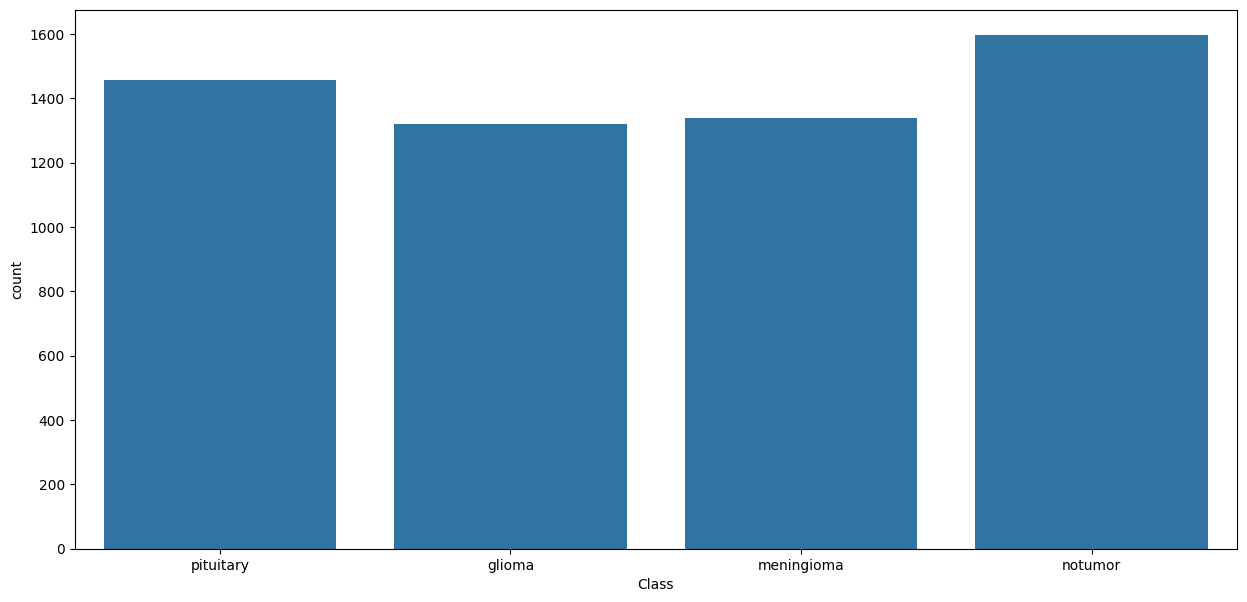

In [10]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

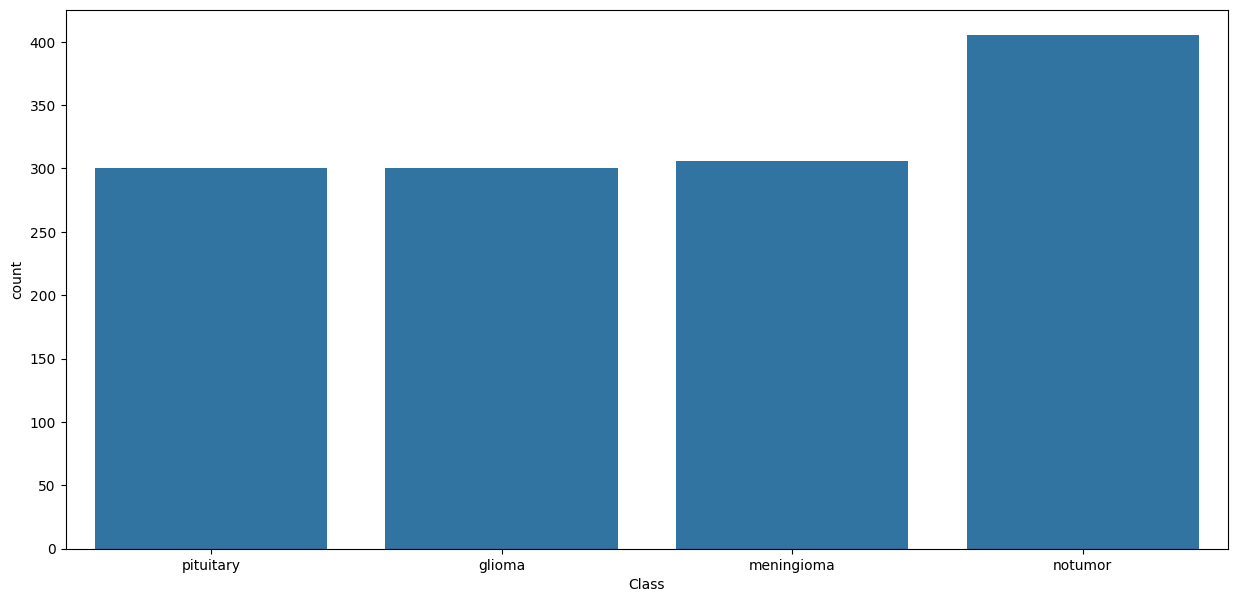

In [11]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [14]:
valid_df

,Class Path,Class
1084,/content/Testing/notumor/Te-no_0322.jpg,notumor
20,/content/Testing/pituitary/Te-pi_0092.jpg,pituitary
1070,/content/Testing/notumor/Te-no_0099.jpg,notumor
510,/content/Testing/glioma/Te-gl_0294.jpg,glioma
113,/content/Testing/pituitary/Te-pi_0035.jpg,pituitary
...,...,...
638,/content/Testing/meningioma/Te-me_0034.jpg,meningioma
578,/content/Testing/glioma/Te-gl_0272.jpg,glioma
1177,/content/Testing/notumor/Te-no_0054.jpg,notumor
1156,/content/Testing/notumor/Te-no_0370.jpg,notumor


In [15]:
ts_df

,Class Path,Class
1189,/content/Testing/notumor/Te-no_0236.jpg,notumor
900,/content/Testing/meningioma/Te-me_0122.jpg,meningioma
205,/content/Testing/pituitary/Te-pi_0105.jpg,pituitary
1142,/content/Testing/notumor/Te-no_0137.jpg,notumor
904,/content/Testing/meningioma/Te-me_0058.jpg,meningioma
...,...,...
121,/content/Testing/pituitary/Te-piTr_0009.jpg,pituitary
643,/content/Testing/meningioma/Te-me_0163.jpg,meningioma
1148,/content/Testing/notumor/Te-no_0287.jpg,notumor
1256,/content/Testing/notumor/Te-no_0131.jpg,notumor


In [16]:
batch_size = 32

img_size = (299,299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)



In [17]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


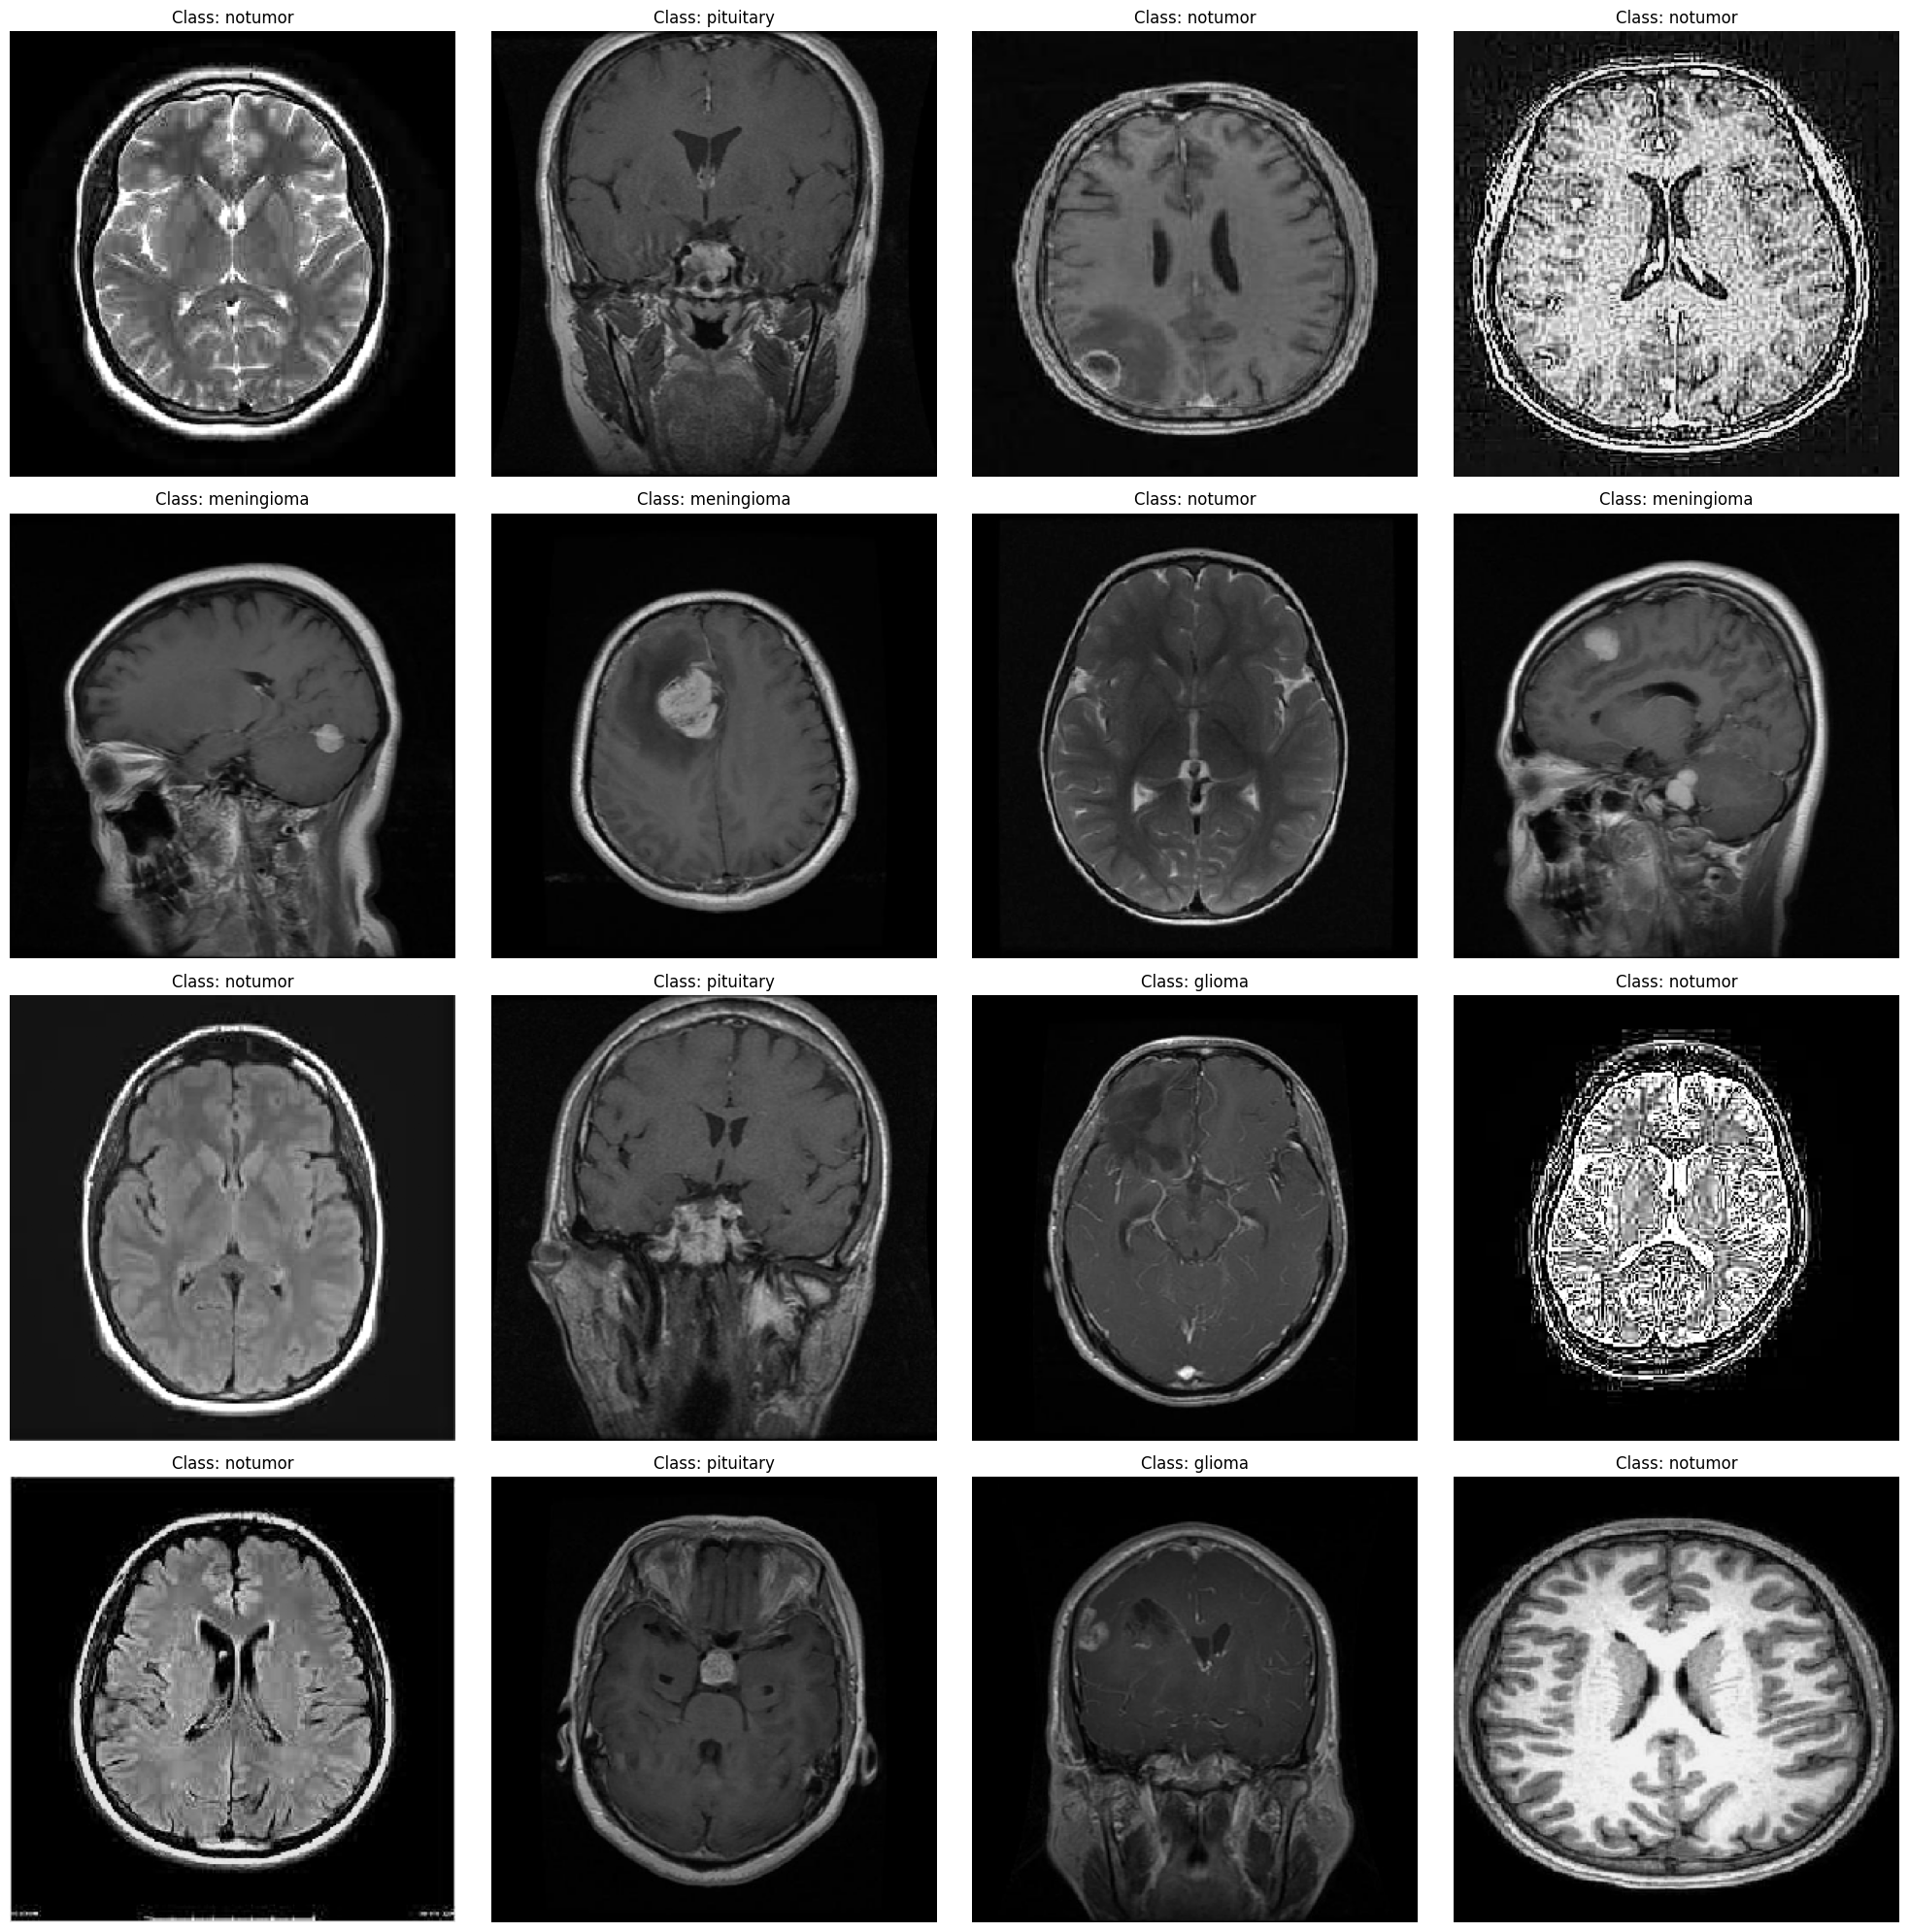

In [18]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [19]:
 img_shape = (299, 299, 3)
 base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling="max"
)
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [20]:
model.compile(
    Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)


In [21]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.6460 - loss: 0.9170 - precision: 0.7789 - recall: 0.4748 - val_accuracy: 0.7405 - val_loss: 0.7564 - val_precision: 0.7547 - val_recall: 0.7282
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 161s 821ms/step - accuracy: 0.9767 - loss: 0.0736 - precision: 0.9787 - recall: 0.9730 - val_accuracy: 0.9496 - val_loss: 0.1119 - val_precision: 0.9525 - val_recall: 0.9481
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 819ms/step - accuracy: 0.9933 - loss: 0.0247 - precision: 0.9933 - recall: 0.9932 - val_accuracy: 0.9756 - val_loss: 0.0742 - val_precision: 0.9755 - val_recall: 0.9740
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 821ms/step - accuracy: 0.9955 - loss: 0.0142 - precision: 0.9957 - recall: 0.9950 - val_accuracy: 0.9664 - val_loss: 0.1134 - val_precision: 0.9664 - val_recall: 0.9649
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 817ms/step - accuracy: 0.9969 - loss: 0.0133 - precision: 0.9969 - recall: 0.9961 - val_accuracy: 0.9893 - val_loss: 

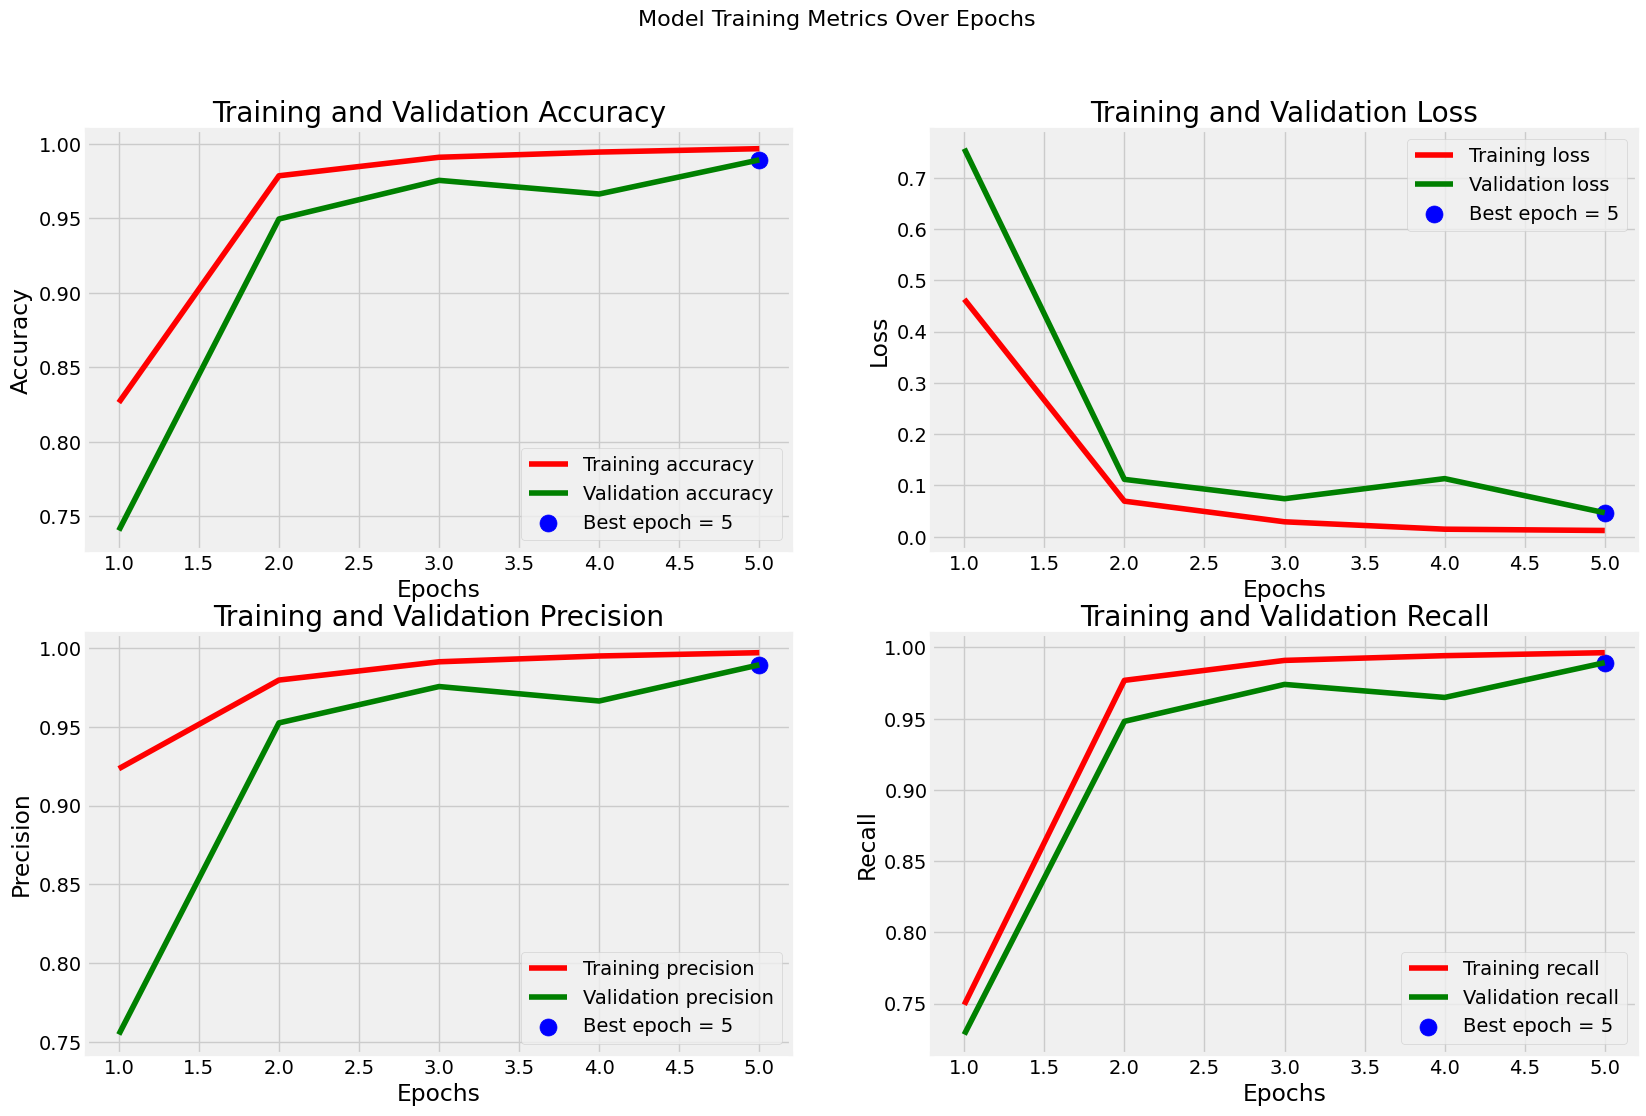

In [22]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.grid(True)
    plt.legend()

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [23]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")

print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")

print(f"\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 250ms/step - accuracy: 0.9962 - loss: 0.0147 - precision: 0.9962 - recall: 0.9962
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.9965 - loss: 0.0177 - precision: 0.9965 - recall: 0.9965
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.9375 - loss: 0.1569 - precision: 0.9375 - recall: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9877 - loss: 0.0420 - precision: 0.9904 - recall: 0.9877
Train Accuracy: 99.61%
Train Loss: 0.0161

Validation Accuracy: 99.08%
Validation Loss: 0.0449

Test Accuracy: 99.09%
Test Loss: 0.0355


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step


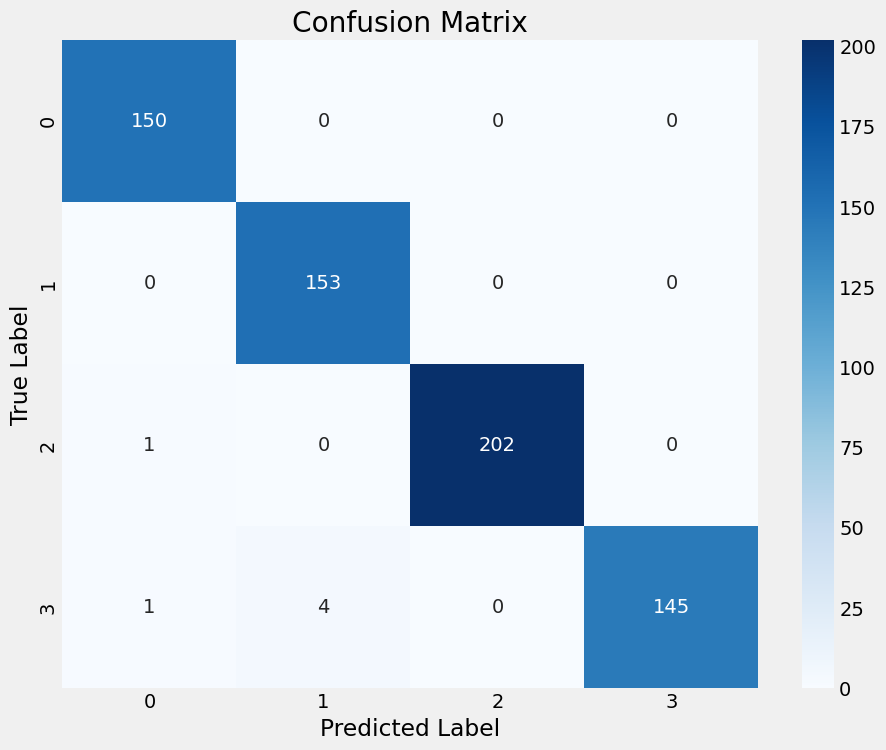

In [24]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.bar(labels, probabilities)
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


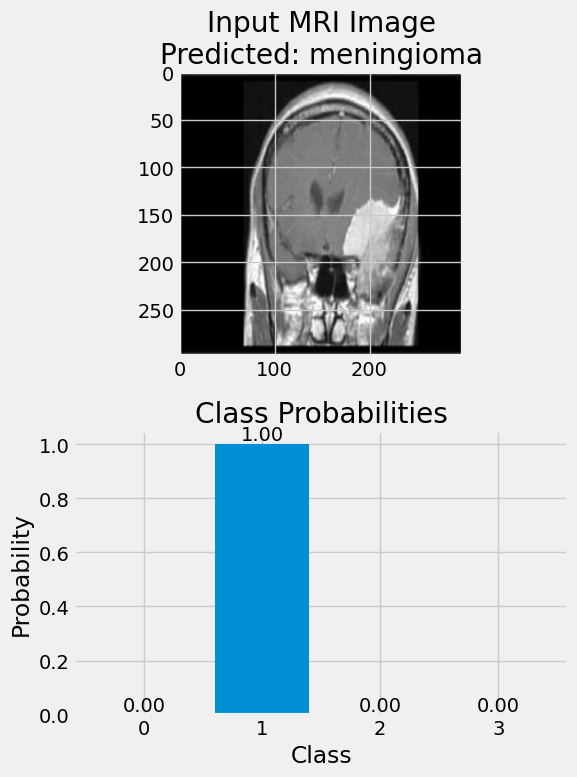


Predicted tumor type: meningioma


In [26]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

In [27]:
model.save_weights("xception_model.weights.h5")

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [29]:
batch_size = 16

img_size = (224,224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size, shuffle=False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [30]:
# Create a Sequential model
cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))
cnn_model.add(Dense(4, activation='softmax'))  # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(optimizer=Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 151s 344ms/step - accuracy: 0.5454 - loss: 2.2167 - precision_1: 0.7178 - recall_1: 0.3600 - val_accuracy: 0.7359 - val_loss: 0.8835 - val_precision_1: 0.7731 - val_recall_1: 0.6763
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 158s 292ms/step - accuracy: 0.7842 - loss: 0.7578 - precision_1: 0.8154 - recall_1: 0.7418 - val_accuracy: 0.8000 - val_loss: 0.6455 - val_precision_1: 0.8393 - val_recall_1: 0.7573
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 145s 299ms/step - accuracy: 0.8536 - loss: 0.5358 - precision_1: 0.8702 - recall_1: 0.8356 - val_accuracy: 0.8656 - val_loss: 0.4818 - val_precision_1: 0.8774 - val_recall_1: 0.8519
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 105s 292ms/step - accuracy: 0.9035 - loss: 0.4038 - precision_1: 0.9099 - recall_1: 0.8963 - val_accuracy: 0.8595 - val_loss: 0.4860 - val_precision_1: 0.8728 - val_recall_1: 0.8382
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 104s 292ms/step - accuracy: 0.9237 - loss: 0.3455 - precision_1: 0.9277 - recall_1: 0.9

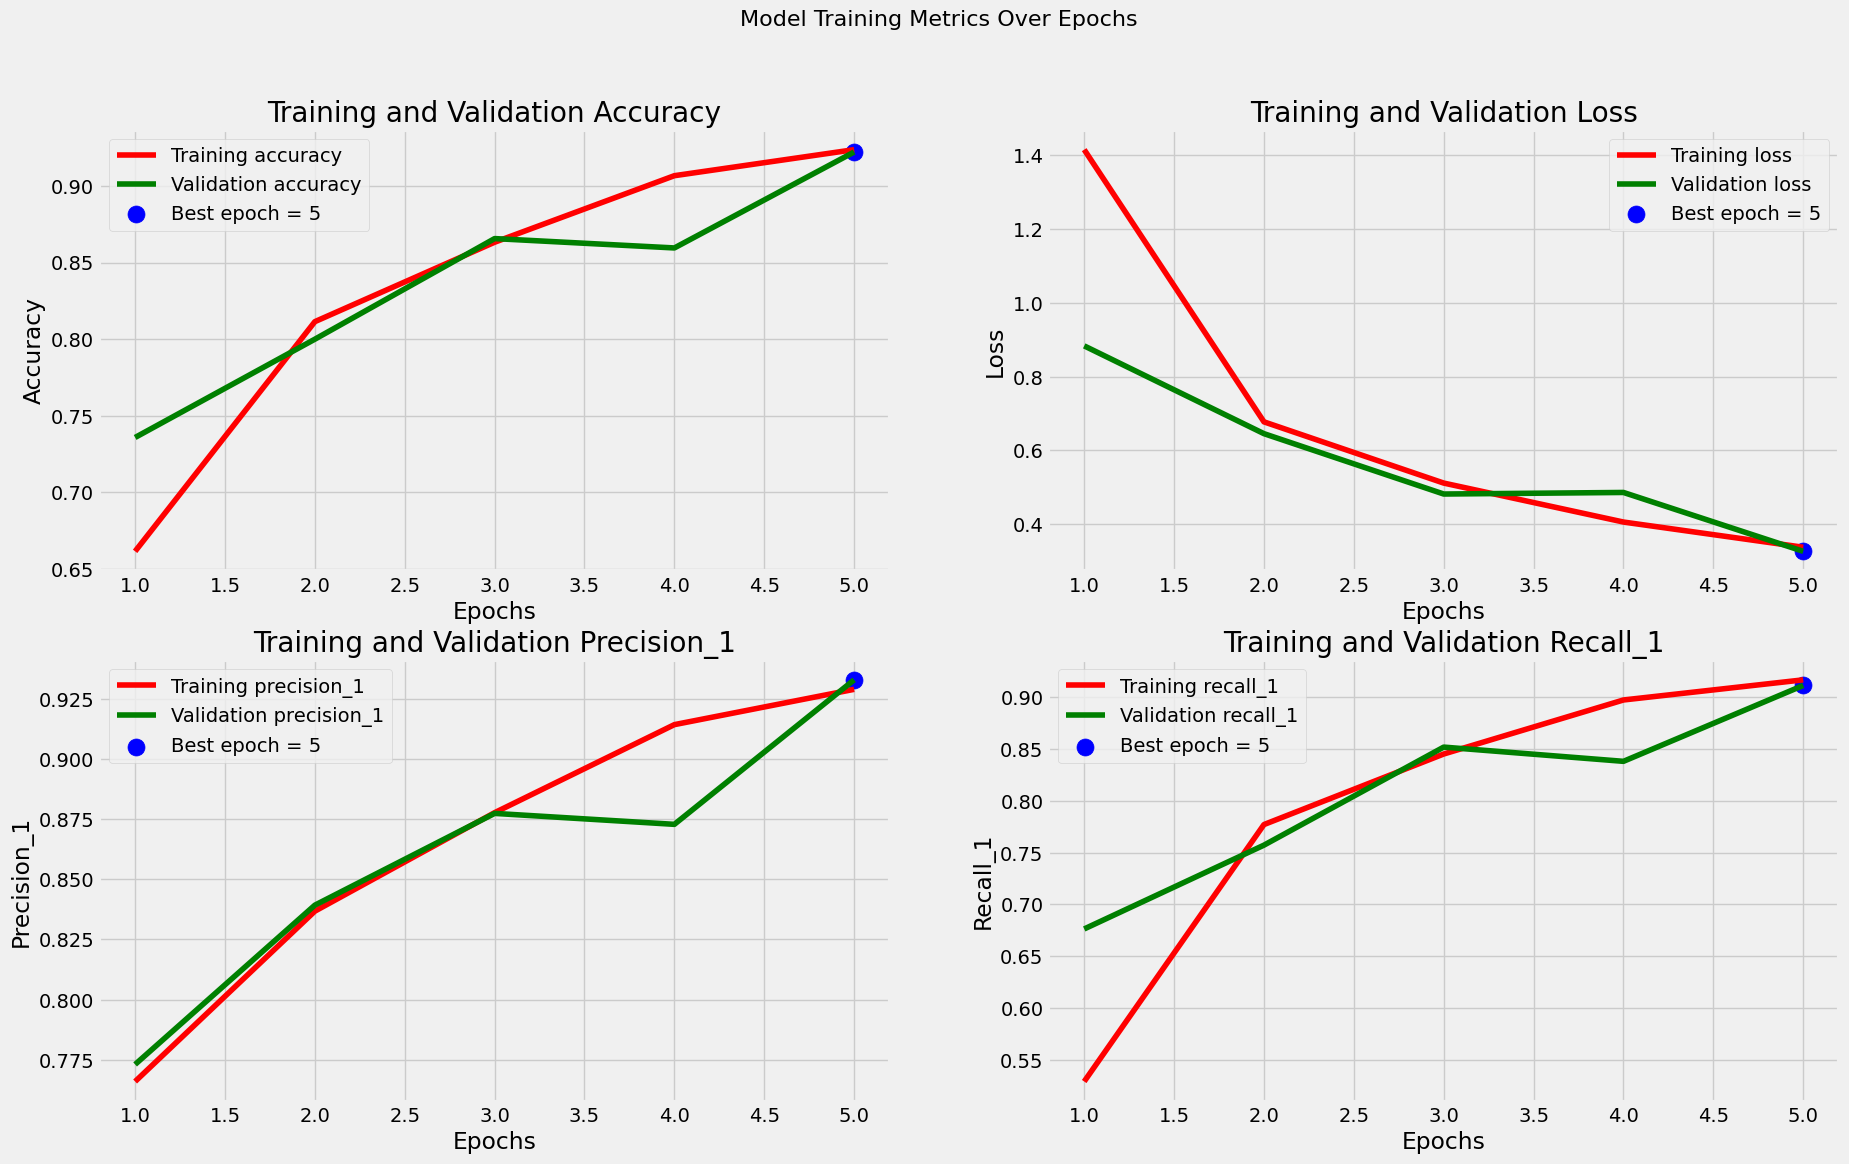

In [32]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.grid(True)
    plt.legend()

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [33]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")

print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")

print(f"\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9603 - loss: 0.2475 - precision_1: 0.9613 - recall_1: 0.9557
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9260 - loss: 0.3312 - precision_1: 0.9367 - recall_1: 0.9221
 2/41 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9844 - loss: 0.1612 - precision_1: 0.9844 - recall_1: 0.9844 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9143 - loss: 0.3256 - precision_1: 0.9195 - recall_1: 0.9082
Train Accuracy: 95.97%
Train Loss: 0.2469

Validation Accuracy: 92.52%
Validation Loss: 0.3279

Test Accuracy: 89.48%
Test Loss: 0.3968


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step


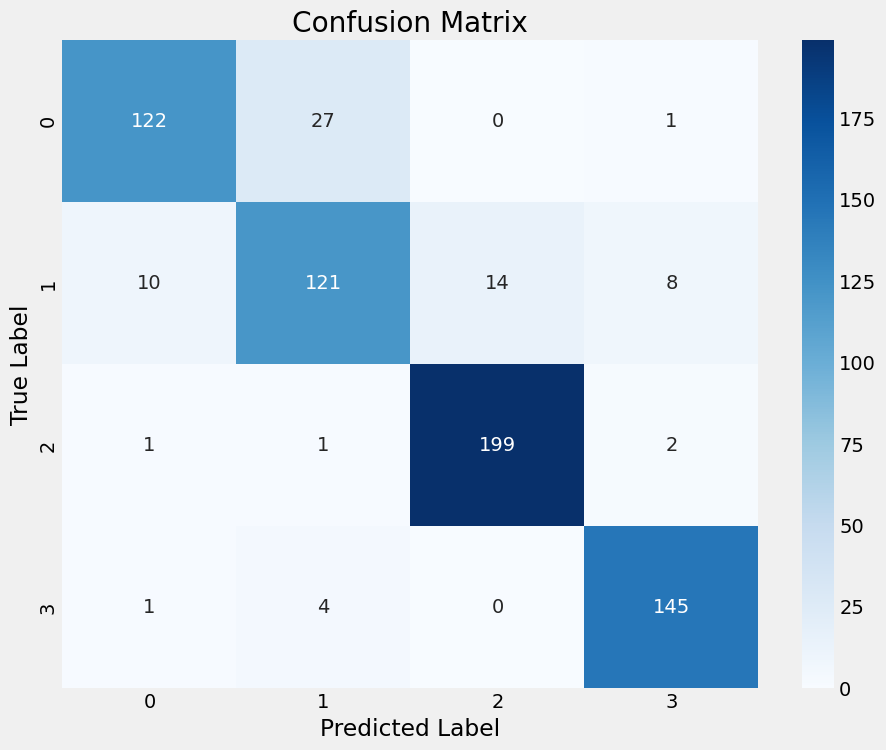

In [34]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       150
           1       0.79      0.79      0.79       153
           2       0.93      0.98      0.96       203
           3       0.93      0.97      0.95       150

    accuracy                           0.89       656
   macro avg       0.89      0.89      0.89       656
weighted avg       0.89      0.89      0.89       656



In [37]:
cnn_model.save("cnn_model.h5")

**Let's set up the streamlit Web App**

In [38]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [41]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [43]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(ngrok_token)

In [44]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

Overwriting app.py

In [55]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from PIL import Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

def load_xception_model(model_path):
    img_shape = (299, 299, 3)
    base_model = tf.keras.applications.Xception(
        include_top=False, weights="imagenet",
        input_shape=img_shape, pooling="max"
    )

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    # Compile the model
    model.compile(
        optimizer=Adamax(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(), Recall()]
    )

    model.load_weights(model_path)
    return model


st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg","png"])

if uploaded_file is not None:
    selected_model = st.radio(
        "Select Model",
        ("Transfer Learning - Xception", "Custom CNN")
    )

    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model('/content/xception_model.weights.h5')
        img_size = (299, 299)
    else:
        model = load_model('/content/cnn_model.h5')
        img_size = (224, 224)

    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)

    # Get the class with the highest probability
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Predicted Class: {result}")
    st.write("Predictions:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.4f}")




Overwriting app.py


In [56]:
thread = Thread(target=run_streamlit)
thread.start()

public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://25ef-34-87-47-54.ngrok-free.app" -> "http://localhost:8501"


In [54]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
    ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://2d96-34-87-47-54.ngrok-free.app -> http://localhost:8501


Closing tunnel: https://6f0c-34-87-47-54.ngrok-free.app -> http://localhost:8501


Closing tunnel: https://d798-34-87-47-54.ngrok-free.app -> http://localhost:8501
